# ChemCharts JSON Movie

## PREPARATION 
Bevor using this notebook dependencies need to be loaded and paths updated.

In [1]:
# load dependencies
import os
import json
import tempfile
from IPython.display import Image

# change me
chemcharts_dir = os.path.expanduser("~/Documents/Projects/ChemCharts") # set project folder on your device
chemcharts_env = os.path.expanduser("~/miniconda3/envs/chemcharts")    # set environment path on your device
output_dir = os.path.expanduser("~/Desktop/chemcharts_json_test")      # set output path on your device

# do NOT change me
try: ipynb_path                                                   
except NameError: ipynb_path = os.getcwd()                             # sets root path

try:
    os.mkdir(output_dir)                                               # checks whether there is an output folder 
except FileExistsError:                                                # and generates one if there isn't one already available
    pass


## INITIALIZATION 
Continue with initializing a configuration dictionary.

In [2]:

conf={"chemcharts": {}}


### Header 
Add a header if needed.

In [3]:

conf={
  "chemcharts": {
    "header": {}                                                        # leave empty if not needed
  }
}


## EXECUTION
### Data loading
Now you can start adding tasks to the config file. Data loading is the obligatory first step.

In [4]:

conf["chemcharts"]["execution"] = [
      {"task":  "data_loading",
       "input":  os.path.join(chemcharts_dir, "data/scaffold_memory.csv"),
       "input_type":  "csv",
       "columns":  {
                     "smiles_column": "SMILES",
                     "scores_column": "total_score",
                     "epochs_column": "Step"
                    }
      }]
    

### Generate fingerprints
Once the data is loaded, we need to translate the chemical strings (SMILES) into fingerprints. There are a couple of different options, here we will use MACCS.

In [5]:

conf["chemcharts"]["execution"].append(
      {"task":  "generate_fingerprints",
       "type":  "maccs",                                                # you can choose between standard, morgan and maccs
       "parameters":  {"useFeatures": True}                             # with the other two fingerprints there are no parameters
      })


### Dimensional reduction
Reduces the number of features in your dataset with an UMP algorithm.

In [6]:

conf["chemcharts"]["execution"].append(
      {"task":  "dimensional_reduction",
       "type": "UMAP",
       "parameters":  {}
      })


### Optional: Filtering
You can define a filter range to reduce the input to the data within the range.

In [7]:

conf["chemcharts"]["execution"].append(
      {"task":  "filtering_data",
       "type": "filtering",
       "parameters":  {"range_dim1": [-100, 100],                       # set range for UMAP_1
                       "range_dim2": [-100, 100]}                       # set range for UMAP_2
      })


### Optional: Clustering
You can further prepare the data by clustering it with KMeans

In [8]:

conf["chemcharts"]["execution"].append(
      {"task":  "clustering_data",
       "type": "KMmeans",
       "parameters":  {"k": 10}                                         # set the number of desired KMeans clusters
      })


### Optional: Binning
You might also want to bin the scores and return their median. Binned scores will then be plotted in a histogram plot.

In [9]:

conf["chemcharts"]["execution"].append(
      {"task":  "binning_scores",
       "type": "binning",
       "parameters":  {"num_bins": 4}                                    # set the number of desired bins
      })


### Write-Out
When using large data sets it is advisable to write out the updated data and use the thereby generated pkl file as input from now onwards (potentially very time saving).

In [10]:

# write-out of data into a pkl file
conf["chemcharts"]["execution"].append({
        "task": "write_out",
        "format": "pkl",
        "path": os.path.join(output_dir, "simple_movie_test.pkl")        # choose loaction for ".pkl" file
      })

# write-out of configuration file
conf_preprocess_JSON_path = os.path.join(output_dir, "chemcharts_preprocess_data.json")
with open(conf_preprocess_JSON_path, 'w') as f:
    json.dump(conf, f, indent=4, sort_keys=True)
    
#execution
!{chemcharts_env}/bin/python {chemcharts_dir}/chemcharts_json.py -conf {conf_preprocess_JSON_path}


Task data_loading completed.
Task generate_fingerprints completed.
Task dimensional_reduction completed.
Task filtering_data completed.
Task clustering_data completed.
Task binning_scores completed.
Task write_out completed.


## MOVIE GENERATION
Once the updated data is saved in a pkl file you can start generating various plots.

### Example: Movie generation (gif)
Here, you see instructions how to generate a hexagonal movie in gif format. ChemCharts can also generate mp4 movies but as this format is currently not displayable in the notebook please access the movie on your device directly.

In [ ]:

%%capture captured_std_stream --no-stdout
%%capture captured_err_stream --no-stderr

# set output path including file name 
hexagonal_movie_path_gif = os.path.join(output_dir, "hexagonal_movie", "hexagonal_movie.gif")

# generates a hexagonal and histogram plot
conf={
  "chemcharts": {
    "header": {},
    "execution": [
      {"task":  "data_loading",
       "input":  [os.path.join(output_dir, "simple_movie_test.pkl")],
       "input_type":  "pkl"
      },
      {"task": "generate_movie",
       "type": "hexagonal_plot",                                              # choose plot type (here: Hexagonal)
       "parameters":  {},                                  
       "settings": {"movie_path": hexagonal_movie_path_gif}           
      }
    ]
  }
}

# write-out of configuration file
configuration_JSON_path = os.path.join(output_dir, "chemcharts_config_movies.json")
with open(configuration_JSON_path, 'w') as f:
    json.dump(conf, f, indent=4, sort_keys=True)
    
#execution
!{chemcharts_env}/bin/python {chemcharts_dir}/chemcharts_json.py -conf {configuration_JSON_path}


In [ ]:

# display movie
Image(filename=hexagonal_movie_path_gif, width=400, height=200)                # with width and height you can alternate the displayed image size     


### Example: Movie generation with contour (gif)
If you want to highlight the current feature generation aktivate the contour function.

In [14]:

%%capture captured_std_stream --no-stdout
%%capture captured_err_stream --no-stderr

# set output path including file name 
hexagonal_contour_movie_path_gif = os.path.join(output_dir, "hexagonal_contour_movie", "hexagonal_contour_movie.gif")  

# plot generation with defined xlim and ylim
conf={
  "chemcharts": {
    "header": {},
    "execution": [
      {"task":  "data_loading",
       "input":  [os.path.join(output_dir, "simple_movie_test.pkl")],
       "input_type":  "pkl"
      },  
      {"task": "generate_movie",
       "type": "hexagonal_plot",                                                     # choose plot type (here: Hexagonal)
       "parameters": {"use_current_epoch": True},                                  
       "settings": {"movie_path": hexagonal_contour_movie_path_gif} 
      }
    ]
  }
}

# write-out of configuration file
configuration_JSON_path = os.path.join(output_dir, "chemcharts_config_movies.json")
with open(configuration_JSON_path, 'w') as f:
    json.dump(conf, f, indent=4, sort_keys=True)
    
#execution
!{chemcharts_env}/bin/python {chemcharts_dir}/chemcharts_json.py -conf {configuration_JSON_path}


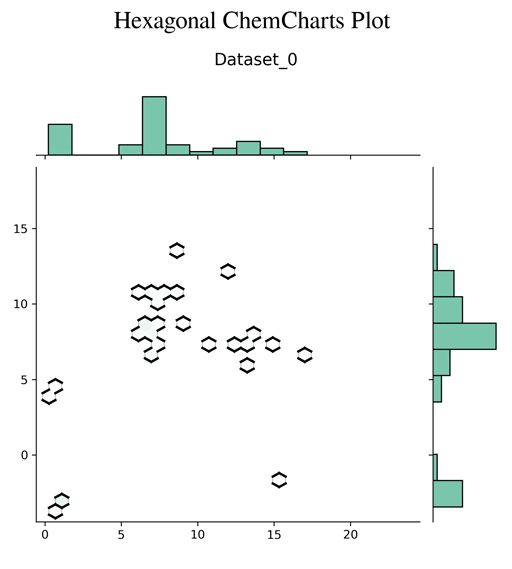

In [19]:

# display movie
Image(filename=hexagonal_contour_movie_path_gif, width=400, height=200)                # with width and height you can alternate the displayed image size     


### Example: Multiple movie generation (gif)
You can also generate multiple movies at once.

In [ ]:

%%capture captured_std_stream --no-stdout
%%capture captured_err_stream --no-stderr

# set output paths including file name 
hexagonal_movie_path_gif = os.path.join(output_dir, "hexagonal_movie", "hexagonal_movie.gif")
scatter_boxplot_movie_path_gif = os.path.join(output_dir, "scatter_boxplot_movie", "scatter_boxplot_movie.gif")

# generates a hexagonal and histogram plot
conf={
  "chemcharts": {
    "header": {},
    "execution": [
      {"task":  "data_loading",
       "input":  [os.path.join(output_dir, "simple_movie_test.pkl")],
       "input_type":  "pkl"
      },
      {"task": "generate_movie",
       "type": "hexagonal_plot",                                               # choose plot type (here: Hexagonal)
       "parameters":  {},                                  
       "settings": {"movie_path": hexagonal_movie_path_gif} 
      },
      {"task": "generate_movie",
       "type": "scatter_boxplot_plot",                                         # choose plot type (here: Scatter Boxplot)
       "parameters":  {},                                  
       "settings": {"movie_path": scatter_boxplot_movie_path_gif} 
      }
    ]
  }
}

# write-out of configuration file
configuration_JSON_path = os.path.join(output_dir, "chemcharts_config_movies.json")
with open(configuration_JSON_path, 'w') as f:
    json.dump(conf, f, indent=4, sort_keys=True)
    
#execution
!{chemcharts_env}/bin/python {chemcharts_dir}/chemcharts_json.py -conf {configuration_JSON_path}


In [ ]:

# display hexagonal movie
Image(filename=hexagonal_movie_path_gif, width=400, height=200)                # with width and height you can alternate the displayed image size     


In [ ]:

# display scatter_boxplot movie
Image(filename=scatter_boxplot_movie_path_gif, width=400, height=200)               


## MOVIE VARIANTS
ChemCharts can generate multiple movie variants, please find them below: 

In [ ]:
    # Scatter Static
      scatter_static_movie_path = os.path.join(output_dir, "scatter_static_movie", "scatter_static_movie.mp4")

      {"task": "generate_movie",
       "type": "scatter_static_plot",                                # choose plot type (here: Scatter Static)
       "parameters":  {},                                  
       "settings": {"movie_path": scatter_static_movie_path} 
      } 
       
        
    # Trisurf Static
      trisurf_static_movie_path = os.path.join(output_dir, "trisurf_static_movie", "trisurf_static_movie.mp4")

      {"task": "generate_movie",
       "type": "trisurf_static_plot",                                # choose plot type (here: Trisurf Static)
       "parameters":  {},                                  
       "settings": {"movie_path": trisurf_static_movie_path} 
      } 
